# Imports

In [11]:
from torch.utils.data import DataLoader, random_split
import torch
from data import PermutationDataset
from model import PermutationModel
from train import train_one_epoch, evaluate_model
import matplotlib.pyplot as plt
import os

# Parameters
This includes parameters for what to train on and predict, and also the hyperparameters for training.

In [12]:
n = 5 # 5 increase n 
label_name = "stat2"
layers = [2] #[7, 2]

epochs = 1000 # increase epochs until curve flattens
train_split, test_split = 0.8, 0.2
learning_rate = 0.001
momentum = 0.9
batch_size = 64

# Initialization
Initialize the data loaders, model, loss function, optimizers.

In [13]:
full_dataset = PermutationDataset(n, label_name)
training_dataset, test_dataset = random_split(full_dataset, [train_split, test_split])
model = PermutationModel(n, layers)
loss_fn = torch.nn.CrossEntropyLoss(full_dataset.class_weights())
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
training_loader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
losses = []

# Training loop
Train the model for the appropriate number of epochs and then save the model in `models`.

In [14]:
os.makedirs('models', exist_ok=True)
for epoch in range(epochs):
    model.train(True)
    current_loss = train_one_epoch(training_loader, model, loss_fn, optimizer)
    print(f"Epoch {epoch}, Loss {current_loss}")
    losses.append(current_loss)

torch.save(model.state_dict(), f"models/{label_name}_{n}.pt")

Epoch 0, Loss 1.3540229797363281
Epoch 1, Loss 1.3237902522087097
Epoch 2, Loss 1.3303881883621216
Epoch 3, Loss 1.3253425359725952
Epoch 4, Loss 1.3280463814735413
Epoch 5, Loss 1.3445715308189392
Epoch 6, Loss 1.3435978293418884
Epoch 7, Loss 1.320133924484253
Epoch 8, Loss 1.3227652311325073
Epoch 9, Loss 1.3254047632217407
Epoch 10, Loss 1.3210322260856628
Epoch 11, Loss 1.3241463899612427
Epoch 12, Loss 1.289427399635315
Epoch 13, Loss 1.3063850402832031
Epoch 14, Loss 1.2970547676086426
Epoch 15, Loss 1.2988572716712952
Epoch 16, Loss 1.3074002861976624
Epoch 17, Loss 1.2910544276237488
Epoch 18, Loss 1.2954316139221191
Epoch 19, Loss 1.278168499469757
Epoch 20, Loss 1.2801321148872375
Epoch 21, Loss 1.2727983593940735
Epoch 22, Loss 1.274277687072754
Epoch 23, Loss 1.26041978597641
Epoch 24, Loss 1.266375482082367
Epoch 25, Loss 1.2635241746902466
Epoch 26, Loss 1.262376070022583
Epoch 27, Loss 1.2521717548370361
Epoch 28, Loss 1.2563446760177612
Epoch 29, Loss 1.229801714420318

# Print the loss curve
Visualize the loss curve to ensure that the model is learning correctly. Save the loss curve in `figures/` so that you can refer to them later.

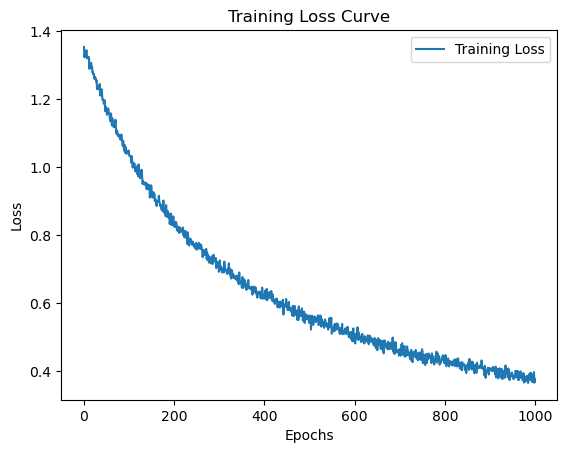

In [15]:
# Create directory for saving figures if it doesn't exist
os.makedirs('figures', exist_ok=True)
# Plot and save the loss curve
plt.figure()
plt.plot(range(epochs), losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.savefig(f'figures/{label_name}_loss_curve.png')
plt.show()

# Evaluate the model
Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.

[[50, 0], [0, 46]]
Accuracy for class 0 = 100.0%
Accuracy for class 1 = 100.0%
Overall accuracy = 100.0%


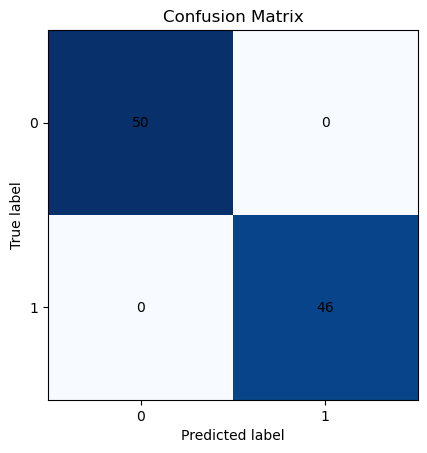

In [16]:
confusion_matrix = evaluate_model(model, training_dataset)
print(confusion_matrix)
confusion_matrix.print_accuracy()
confusion_matrix.plot()

# Plot model weights and connections.
Plot the model weights and connections in order to attempt to interpret what the model is learning.

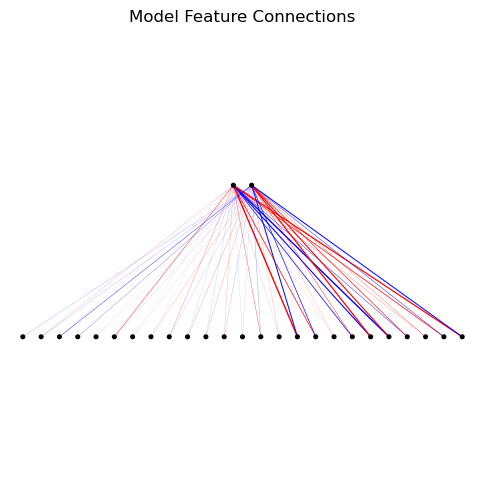

In [17]:
model.plot_connections()

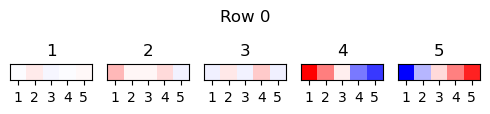

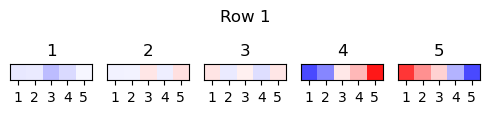

In [18]:
model.plot_heatmap_feature(0,0)
model.plot_heatmap_feature(0,1)

In [19]:
#model.plot_heatmap_feature(1,0)
#model.plot_heatmap_feature(1,1)

#model.plot_heatmap_feature(0,4)

In [20]:
import pandas as pd

# Load the original dataset
file_path = f"data/permutations_{n}.csv"
df = pd.read_csv(file_path)

# Apply the rule to compute stat2
df['computed_stat2'] = df['permutation'].apply(lambda x: 1 if int(x.strip("()").split(", ")[-1]) < int(x.strip("()").split(", ")[-2]) else 0)

# Check if the rule is 100% correct
accuracy_stat2 = (df['stat2'] == df['computed_stat2']).mean()

print(f"Accuracy for stat2: {accuracy_stat2 * 100}%")

Accuracy for stat2: 100.0%
